In [28]:
#Plotter for Higgs Combine FitDiagnostics and for MonoZ datacards
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ROOT
import uproot
import uproot_methods
import physt
from scipy import interpolate
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
from scipy.optimize import curve_fit, fsolve

plt.style.use('physics.mplstyle')

In [106]:
#Open the file and grab the histograms
fn = '/eos/user/c/cfreer/Moriond_2020/CMSSW_10_2_13/src/MonoZFinalFit/ZH_Mix/cards-ZH/shapes-chBSM2018.root'
f = uproot.open(fn)
histograms = f.allitems( filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))

In [107]:
#grab the histograms
for name, roothist in histograms:
    name = name.decode("utf-8")
    name = name.replace(";1", "")
    era = "2018"
    if  "ZZ" in name:
            ZZ_freq = np.abs(roothist.numpy())[0]          
    if  "WZ" in name:
            WZ_freq = np.abs(roothist.numpy())[0]
    if  "WW" in name:
            WW_freq = np.abs(roothist.numpy())[0]
    if  "TOP" in name:
            TOP_freq = np.abs(roothist.numpy())[0]
    if  "DY" in name:
            DY_freq = np.abs(roothist.numpy())[0]
    if  "VVV" in name:
            VVV_freq = np.abs(roothist.numpy())[0]
    if  "total_background" in name:
            bg_freq2 = np.abs(roothist.numpy())[0]
    if  "data_obs" in name:
            data_freq = np.abs(roothist.numpy())[0]
histo_bg = ZZ_freq + WZ_freq + WW_freq + TOP_freq + DY_freq + VVV_freq

In [108]:
print (data_freq)

[4.150e+02 1.920e+02 1.100e+02 8.400e+01 3.300e+01 4.000e+01 1.700e+01
 5.000e+00 1.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 1.469e+03
 1.630e+02 7.700e+01 5.600e+01 2.600e+01 3.700e+01 1.500e+01 7.000e+00
 5.000e+00 3.000e+00 0.000e+00 0.000e+00]


In [109]:
#Open the file and grab the histograms
fnGuill = '/eos/user/c/cfreer/Moriond_2020/CMSSW_10_2_13/src/MonoZFinalFit/Guill/zh_2018_0j_input.root'
fGuill = uproot.open(fnGuill)
histograms_Guill = fGuill.allitems( filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))
for name, roothist in histograms_Guill:
    print(name)

b'histo_Data;1'
b'histo_DY;1'
b'histo_DY_QCDScale_DY_ACCEPTUp;1'
b'histo_DY_QCDScale_DY_ACCEPTDown;1'
b'histo_DY_PDFUp;1'
b'histo_DY_PDFDown;1'
b'histo_DY_CMS_eff_mUp;1'
b'histo_DY_CMS_eff_mDown;1'
b'histo_DY_CMS_eff_eUp;1'
b'histo_DY_CMS_eff_eDown;1'
b'histo_DY_CMS_puUp;1'
b'histo_DY_CMS_puDown;1'
b'histo_DY_CMS_btagb_2016Up;1'
b'histo_DY_CMS_btagb_2016Down;1'
b'histo_DY_CMS_btagl_2016Up;1'
b'histo_DY_CMS_btagl_2016Down;1'
b'histo_DY_CMS_jes_2016Up;1'
b'histo_DY_CMS_jes_2016Down;1'
b'histo_DY_CMS_prefire_2016Up;1'
b'histo_DY_CMS_prefire_2016Down;1'
b'histo_DY_CMS_trigger_2016Up;1'
b'histo_DY_CMS_trigger_2016Down;1'
b'histo_DY_CMS_btagb_2017Up;1'
b'histo_DY_CMS_btagb_2017Down;1'
b'histo_DY_CMS_btagl_2017Up;1'
b'histo_DY_CMS_btagl_2017Down;1'
b'histo_DY_CMS_jes_2017Up;1'
b'histo_DY_CMS_jes_2017Down;1'
b'histo_DY_CMS_prefire_2017Up;1'
b'histo_DY_CMS_prefire_2017Down;1'
b'histo_DY_CMS_trigger_2017Up;1'
b'histo_DY_CMS_trigger_2017Down;1'
b'histo_DY_CMS_btagb_2018Up;1'
b'histo_DY_CMS_btagb_

In [110]:
#grab the histograms
for name, roothist in histograms_Guill:
    name = name.decode("utf-8")
    name = name.replace(";1", "")
    era = "2018"
    if  "histo_ZZ" in name:
            ZZ_freq2 = np.abs(roothist.numpy())[0]          
    if  "histo_WZ" in name:
            WZ_freq2 = np.abs(roothist.numpy())[0]
    if  "histo_EM" in name:
            EM_freq2 = np.abs(roothist.numpy())[0]
    #if  "histo_TOP" in name:
   #         TOP_freq2 = np.abs(roothist.numpy())[0]
    if  "histo_DY" in name:
            DY_freq2 = np.abs(roothist.numpy())[0]
    if  "histo_VVV" in name:
            VVV_freq2 = np.abs(roothist.numpy())[0]
    if  "total_background" in name:
            bg_freq2 = np.abs(roothist.numpy())[0]
    if  "histo_Data" in name:
            print (roothist.numpy())
            data_freq2 = np.abs(roothist.numpy())[0]
histo_bg2 = ZZ_freq2 + WZ_freq2 + EM_freq2 + DY_freq2 + VVV_freq2

(array([ 59., 431., 377., 220., 130.,  63.,  61.,  25.,   8.,   7.,   5.,
         0.,   1.]), array([   0.,   80.,  100.,  125.,  150.,  175.,  200.,  250.,  300.,
        350.,  400.,  500.,  600., 1000.]))


[431. 377. 220. 130.  63.  61.  25.   8.   7.   5.   0.   1.]
[415. 192. 110.  84.  33.  40.  17.   5.   1.   2.   0.   0.]


Text(0.5, 0, '$p_{T}^{miss}$ (GeV)')

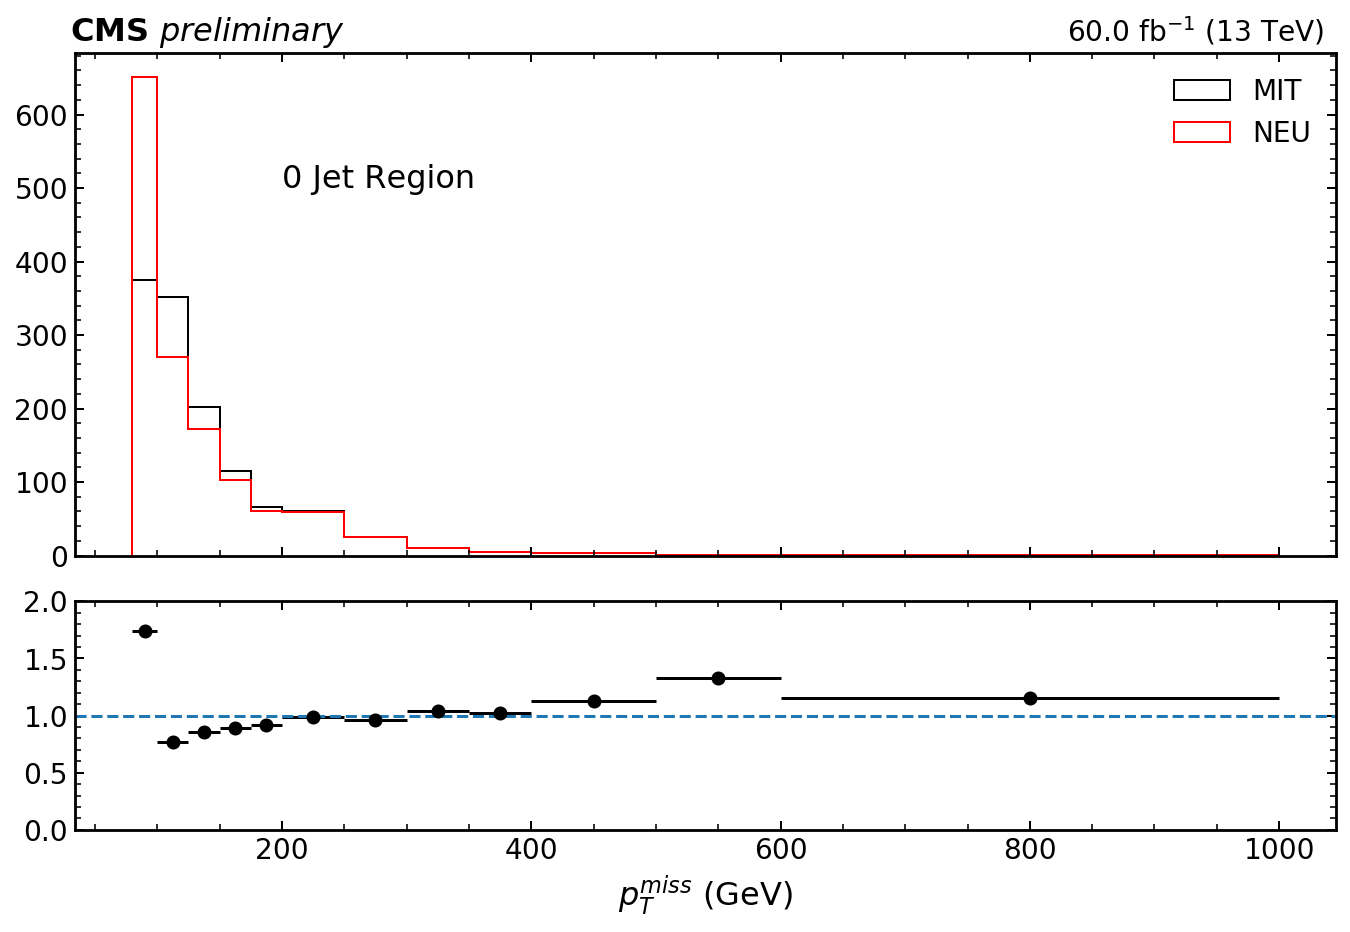

In [120]:
bins = np.array([  80.,  100.,  125.,  150.,  175.,  200.,  250.,  300.,
        350.,  400.,  500.,  600., 1000.])
binc = np.array([ 0.5*(bins[i]+bins[i+1])for i in range(bins.shape[0]-1)])
xerr = np.diff(bins)*0.5

#Set up variables for the stacked histogram
plt.figure(figsize=(12,10))
plt.gcf().subplots_adjust(bottom=0.15, left=0.17)
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)

#ax1.hist(binc,bins=bins,weights=data_freq2[1:], color="black",histtype='step',label='MIT')
ax1.hist(binc,bins=bins,weights=histo_bg2[1:], color="black",histtype='step',label='MIT')
data_chad = data_freq[:12]
bg_chad = histo_bg[:12]
print (data_freq2[1:])
print (data_chad)
#ax1.hist(binc,bins=bins,weights=data_chad, color="red",histtype='step',label='NEU')
ax1.hist(binc,bins=bins,weights=bg_chad, color="red",histtype='step',label='NEU')
ax1.legend(loc="upper right", fontsize=14)

cms = ax1.text(
        30, 700., u"CMS $\it{preliminary}$",
        fontsize=16, fontweight='bold',
    )
lumi = ax1.text(
        830, 700., r"%.1f fb$^{-1}$ (13 TeV)" % 60,
        fontsize=14, 
    )

region = ax1.text(
        200, 500., u"0 Jet Region",
        fontsize=16,
    )

ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.errorbar(binc,np.where(data_freq2[1:]>0,data_chad/data_freq2[1:],1), xerr=xerr, color="black", fmt='o')
ax2.errorbar(binc,np.where(histo_bg2[1:]>0,bg_chad/histo_bg2[1:],1), xerr=xerr, color="black", fmt='o')
ax2.axhline(1, ls="--")
ax2.set_ylim(0,2)
ax2.set_xlabel(r"$p_{T}^{miss}$ (GeV)")

In [112]:
#Open the file and grab the histograms
fnGuill2 = '/eos/user/c/cfreer/Moriond_2020/CMSSW_10_2_13/src/MonoZFinalFit/Guill/zh_2018_1j_input.root'
fGuill2 = uproot.open(fnGuill2)
histograms_Guill2 = fGuill.allitems( filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))
for name, roothist in histograms_Guill2:
    print(name)

b'histo_Data;1'
b'histo_DY;1'
b'histo_DY_QCDScale_DY_ACCEPTUp;1'
b'histo_DY_QCDScale_DY_ACCEPTDown;1'
b'histo_DY_PDFUp;1'
b'histo_DY_PDFDown;1'
b'histo_DY_CMS_eff_mUp;1'
b'histo_DY_CMS_eff_mDown;1'
b'histo_DY_CMS_eff_eUp;1'
b'histo_DY_CMS_eff_eDown;1'
b'histo_DY_CMS_puUp;1'
b'histo_DY_CMS_puDown;1'
b'histo_DY_CMS_btagb_2016Up;1'
b'histo_DY_CMS_btagb_2016Down;1'
b'histo_DY_CMS_btagl_2016Up;1'
b'histo_DY_CMS_btagl_2016Down;1'
b'histo_DY_CMS_jes_2016Up;1'
b'histo_DY_CMS_jes_2016Down;1'
b'histo_DY_CMS_prefire_2016Up;1'
b'histo_DY_CMS_prefire_2016Down;1'
b'histo_DY_CMS_trigger_2016Up;1'
b'histo_DY_CMS_trigger_2016Down;1'
b'histo_DY_CMS_btagb_2017Up;1'
b'histo_DY_CMS_btagb_2017Down;1'
b'histo_DY_CMS_btagl_2017Up;1'
b'histo_DY_CMS_btagl_2017Down;1'
b'histo_DY_CMS_jes_2017Up;1'
b'histo_DY_CMS_jes_2017Down;1'
b'histo_DY_CMS_prefire_2017Up;1'
b'histo_DY_CMS_prefire_2017Down;1'
b'histo_DY_CMS_trigger_2017Up;1'
b'histo_DY_CMS_trigger_2017Down;1'
b'histo_DY_CMS_btagb_2018Up;1'
b'histo_DY_CMS_btagb_

In [113]:
#grab the histograms
for name, roothist in histograms_Guill2:
    name = name.decode("utf-8")
    name = name.replace(";1", "")
    era = "2018"
    if  "histo_ZZ" in name:
            ZZ_freq3 = np.abs(roothist.numpy())[0]          
    if  "histo_WZ" in name:
            WZ_freq3 = np.abs(roothist.numpy())[0]
    if  "histo_EM" in name:
            EM_freq3 = np.abs(roothist.numpy())[0]
    #if  "histo_TOP" in name:
   #         TOP_freq2 = np.abs(roothist.numpy())[0]
    if  "histo_DY" in name:
            DY_freq3 = np.abs(roothist.numpy())[0]
    if  "histo_VVV" in name:
            VVV_freq3 = np.abs(roothist.numpy())[0]
    if  "total_background" in name:
            bg_freq3 = np.abs(roothist.numpy())[0]
    if  "histo_Data" in name:
            print (roothist.numpy())
            data_freq3 = np.abs(roothist.numpy())[0]
histo_bg3 = ZZ_freq3 + WZ_freq3 + EM_freq3 + DY_freq3 + VVV_freq3

(array([ 59., 431., 377., 220., 130.,  63.,  61.,  25.,   8.,   7.,   5.,
         0.,   1.]), array([   0.,   80.,  100.,  125.,  150.,  175.,  200.,  250.,  300.,
        350.,  400.,  500.,  600., 1000.]))


[431. 377. 220. 130.  63.  61.  25.   8.   7.   5.   0.   1.]
[415. 192. 110.  84.  33.  40.  17.   5.   1.   2.   0.   0.]


Text(0.5, 0, '$p_{T}^{miss}$ (GeV)')

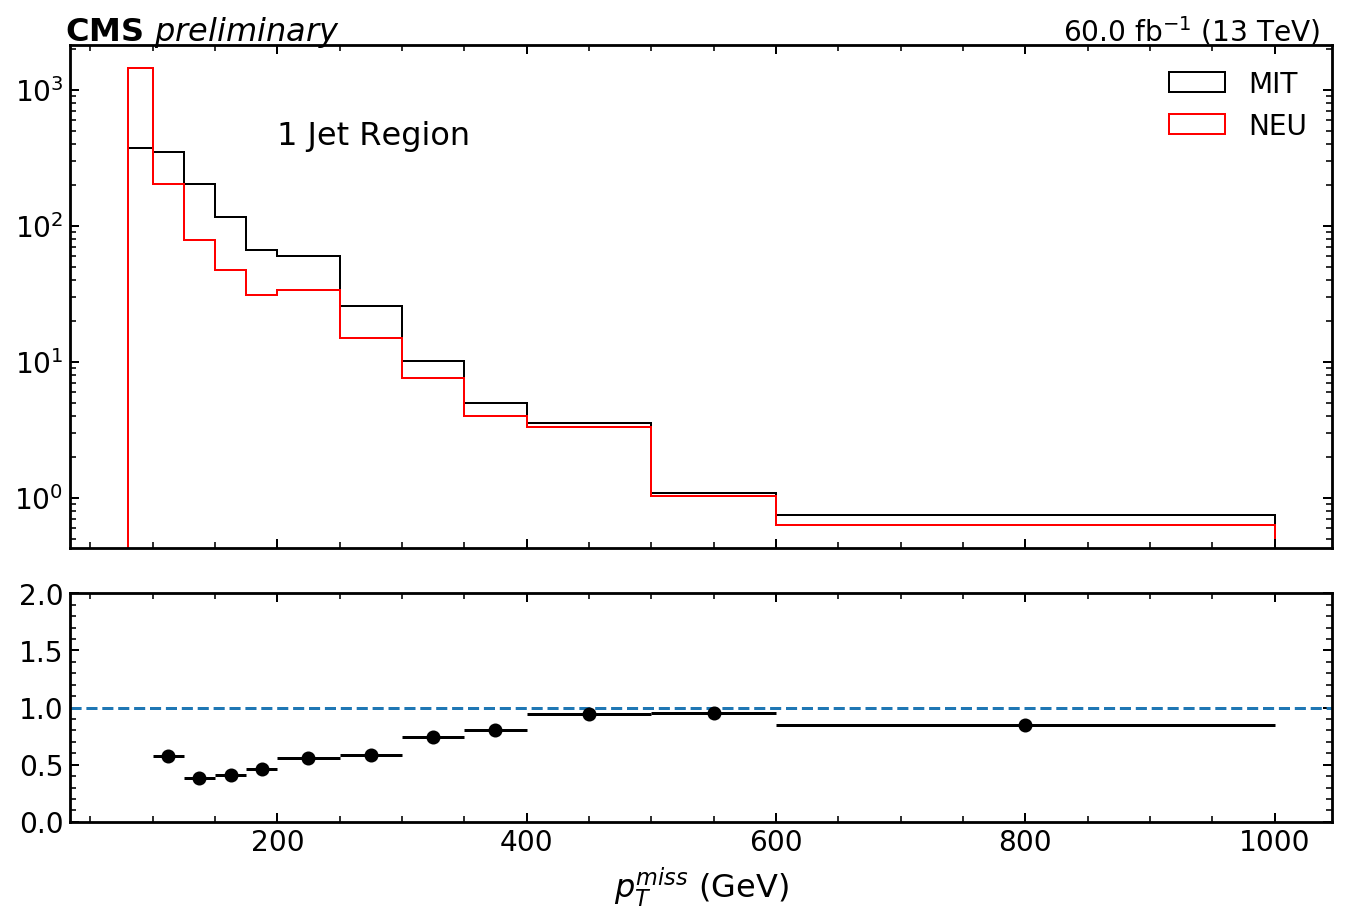

In [124]:
bins = np.array([  80.,  100.,  125.,  150.,  175.,  200.,  250.,  300.,
        350.,  400.,  500.,  600., 1000.])
binc = np.array([ 0.5*(bins[i]+bins[i+1])for i in range(bins.shape[0]-1)])
xerr = np.diff(bins)*0.5

#Set up variables for the stacked histogram
plt.figure(figsize=(12,10))
plt.gcf().subplots_adjust(bottom=0.15, left=0.17)
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)

#ax1.hist(binc,bins=bins,weights=data_freq3[1:], color="black",histtype='step',label='MIT')
ax1.hist(binc,bins=bins,weights=histo_bg3[1:], color="black",histtype='step',label='MIT')
data_chad2 = data_freq[13:]
bg_chad2 = histo_bg[13:]
print (data_freq2[1:])
print (data_chad)
#ax1.hist(binc,bins=bins,weights=data_chad, color="red",histtype='step',label='NEU')
ax1.hist(binc,bins=bins,weights=bg_chad2, color="red",histtype='step',label='NEU')
ax1.legend(loc="upper right", fontsize=14)
ax1.set_yscale("log")

cms = ax1.text(
        30, 2300., u"CMS $\it{preliminary}$",
        fontsize=16, fontweight='bold',
    )
lumi = ax1.text(
        830, 2300., r"%.1f fb$^{-1}$ (13 TeV)" % 60,
        fontsize=14, 
    )

region = ax1.text(
        200, 400., u"1 Jet Region",
        fontsize=16,
    )

ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.errorbar(binc,np.where(data_freq2[1:]>0,data_chad/data_freq2[1:],1), xerr=xerr, color="black", fmt='o')
ax2.errorbar(binc,np.where(histo_bg3[1:]>0,bg_chad2/histo_bg3[1:],1), xerr=xerr, color="black", fmt='o')
ax2.axhline(1, ls="--")
ax2.set_ylim(0,2)
ax2.set_xlabel(r"$p_{T}^{miss}$ (GeV)")